### 1. Importing Required Modules and Packages

In [1]:
import os
import sys

sys.path.append('..')
os.environ["OMP_NUM_THREADS"] = '1'  # KMeans is not parallelized, so set to 1 thread

from src.mutation import Mutation
from src.sequence import Vector, Gene
from src.eblocks import Eblock, EblockDesign
import biotite.sequence as seq
from src.primer import DesignPrimers
from src.plot import Plot

%reload_ext autoreload
%autoreload 2

In [2]:
# Create a Mutation object and parse the input mutations from the files/ directory

mutations_file = os.path.join('DnaE1_original', 'mutations.txt')

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed
mutation_instance.print_mutations()

The selected mutations are:
	Mutation  	Y75S      
	Deletion  	P78-S104  
	Mutation  	Y105G     
	Mutation  	W137F     
	Mutation  	D226G     
	Mutation  	F258A     
	Combined  	D428S, R429D
	Mutation  	K463A     
	Mutation  	Y470G     
	Combined  	Y470G, G471F
	Deletion  	P486-K492 
	Combined  	E509Q, R514D
	Mutation  	R514D     
	Mutation  	E534R     
	Mutation  	R563A     
	Combined  	I596A, I597L
	Mutation  	D640E     
	Mutation  	I663F     
	Mutation  	M810C     
	Mutation  	L848A     
	Mutation  	Y859L     
	Mutation  	R865A     
	Mutation  	I897D     
	Mutation  	Q946A     


In [3]:
print(len(mutation_instance.mutations))

24


In [4]:
# Create a Plasmid object and parse the input plasmid from the files/ directory

# Read sequence
sequence_file = os.path.join('DnaE1_original', 'A0QX55.fasta')
vector_file = os.path.join('DnaE1_original', 'dnae1-pinit.gb')

gene_instance = Gene()
gene_instance.parse_sequence(sequence_file)
vector_instance = Vector(gene=gene_instance)
vector_instance.parse_vector(vector_file)

In [5]:
# Create an Eblocks object based on the input mutations and the gene sequence

output_dir = os.path.join('DnaE1_original')

design_instance = EblockDesign(mutation_instance=mutation_instance,
                            gene_instance=gene_instance,
                            vector_instance=vector_instance,
                            output_dir=output_dir,
                            verbose=True,
                            codon_usage='CP000480.1',  # Mycobacterium smegmatis mc2 155
                            cost_optimization=True,
                            amount_optimization=False)

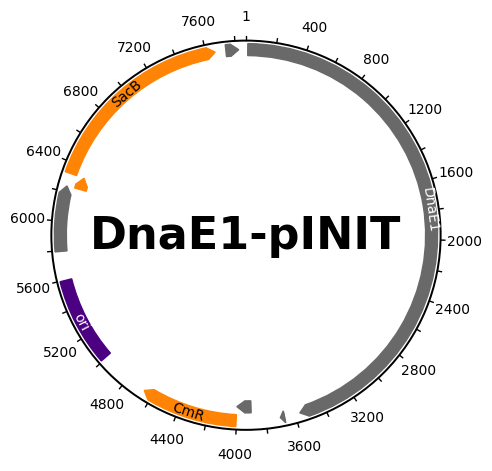

In [6]:
# Create a Plots object and check the input vector

# Create the Plot object
plot_instance = Plot(mutation_instance=mutation_instance,
                    eblocks_design_instance=design_instance,
                    vector_instance=vector_instance,
                    gene_instance=gene_instance,
                    output_dir=output_dir,
                    show=True)

# Check the input vector
plot_instance.plot_vector(figsize=(5, 5));

Calculating relative codon frequencies, based on the selected genome id CP000480.1 ...
Starting eBlock design ...
Processing mutation: Y75S
Processing mutation: P78-S104
Deletion indices: 234, 312
Processing mutation: Y105G
Processing mutation: W137F
Processing mutation: D226G
Processing mutation: F258A
Processing mutation: D428S-R429D
Multiple mutation indices: [1284, 1287]
Multiple mutation constraints: [(234, 312), (1284, 1287)]
Processing mutation: K463A
Processing mutation: Y470G
Processing mutation: Y470G-G471F
Multiple mutation indices: [1410, 1413]
Multiple mutation constraints: [(234, 312), (1284, 1287), (1410, 1413)]
Processing mutation: P486-K492
Deletion indices: 1458, 1476
Processing mutation: E509Q-R514D
Multiple mutation indices: [1527, 1542]
Multiple mutation constraints: [(234, 312), (1284, 1287), (1410, 1413), (1458, 1476), (1527, 1542)]
Processing mutation: R514D
Processing mutation: E534R
Processing mutation: R563A
Processing mutation: I596A-I597L
Multiple mutation 

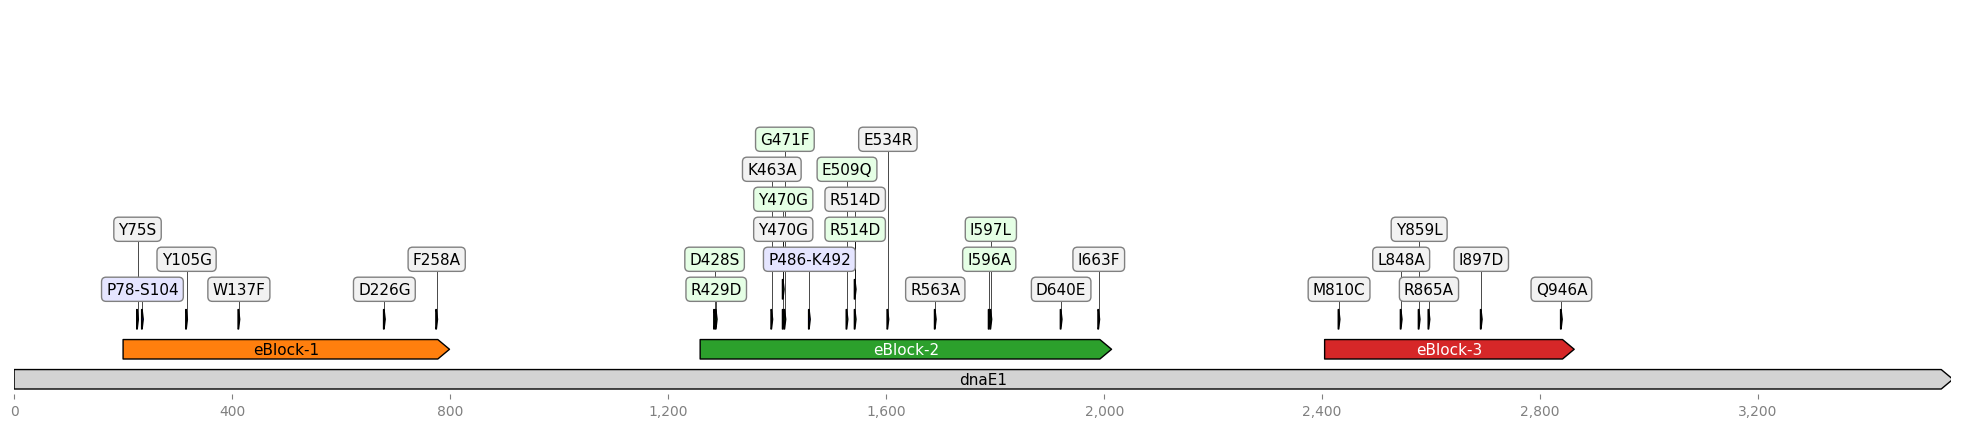

unprocessed: []


In [7]:
# Run the eBlocks design and print the results
# design_instance.max_eblock_length = 1400
design_instance.run_design_eblocks()
plot_instance.plot_eblocks_mutations(figure_length=25,
                                     figure_width=5)
print("unprocessed:", mutation_instance.unprocessed_mutations)

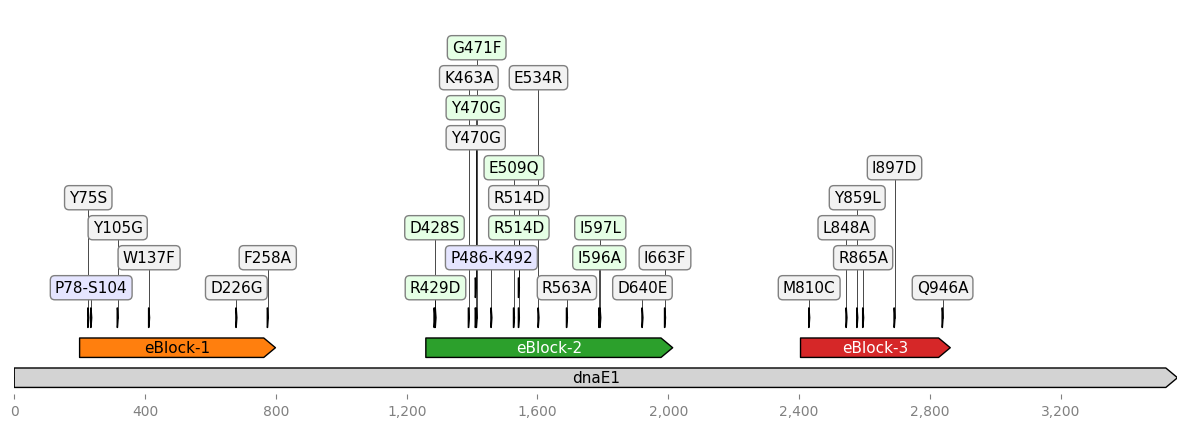

In [8]:
plot_instance.plot_eblocks_mutations(figure_length=15,
                                     figure_width=5)

In [9]:
for eblock in design_instance.wt_eblocks:
    print(eblock.name, eblock.sequence)

eBlock-1 GCCGATCATCGGCGTGGAGGCATACATCGCGCCGGGCTCGCGGTTCGACACCCGGCGCATCCTGTGGGGTGACCCCAGCCAAAAGGCCGACGACGTCTCCGGCAGCGGCTCCTACACGCACCTGACGATGATGGCCGAGAACGCCACCGGTCTGCGCAACCTGTTCAAGCTGTCCTCGCATGCTTCCTTCGAGGGCCAGCTGAGCAAGTGGTCGCGCATGGACGCCGAGCTCATCGCCGAACACGCCGAGGGCATCATCATCACCACCGGATGCCCGTCGGGGGAGGTGCAGACCCGCCTGCGGCTCGGCCAGGATCGGGAGGCGCTCGAAGCCGCGGCGAAGTGGCGGGAGATCGTCGGACCGGACAACTACTTCCTTGAGCTGATGGACCACGGGCTGACCATCGAACGCCGGGTCCGTGACGGTCTGCTCGAGATCGGACGCGCGCTCAACATTCCGCCTCTTGCCACCAATGACTGCCACTACGTGACCCGCGACGCCGCCCACAACCATGAGGCTTTGTTGTGTGTGCAGACCGGCAAGACCCTCTCGGATCCGAATCGCTTCAAGTTCGACGGTGACGGCTACTACCTGAAGT
eBlock-2 CGACATCGATATCGACTTCGACGACCGGCGCCGCGGTGAGATGGTGCGCTACGCAGCCGACAAGTGGGGCCACGACCGGGTCGCGCAGGTCATCACCTTCGGCACCATCAAAACCAAAGCGGCGCTGAAGGATTCGGCGCGAATCCACTACGGGCAGCCCGGGTTCGCCATCGCCGACCGGATCACCAAGGCGTTGCCGCCGGCGATCATGGCCAAAGACATCCCGCTGTCTGGGATCACCGATCCCAGCCACGAACGGTACAAGGAGGCCGCCGAGGTCCGCGGCCTGATCGAAACCGACCCGGACGTACGCACCATCTACCAGACCGCACGCGGGTTGGAAGGCCTGATCCGCAACGCGGGTGTGCACGCCTGCGCGGTG

In [10]:
settingsfile = 'settings/primer3-settings.txt'
seq_settingsfile = 'settings/primer3-seq-settings.txt'

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 eblocks_design_instance=design_instance,
                                 primers_settingsfile=settingsfile,
                                 seqprimers_settingsfile=seq_settingsfile,
                                 vector_instance=vector_instance,
                                 output_dir=output_dir)

primers_instance.run_design()

Designing primer pairs ...
eBlock-1 Overhangs: 12, -1
eBlock-2 Overhangs: 8, -1
eBlock-3 Overhangs: 11, -1
Designing sequencing primers ...
Finished designing primers.
